# 생물정보학 및 실습 1 - Term Project용 환경 셋업

```
생물정보학 및 실습 1
서울대학교 생물정보학전공/생명과학부 2024년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```

이 노트북은 Google Colab을 이용해서 Term Project를 할 수 있도록 환경을 준비해 줍니다. 터미널 사용이 원활하지 않은 상태이고, 데이터를 오랫동안 보관하기 어렵기 때문에 되도록 개인용 컴퓨터에서 [Anaconda](https://www.anaconda.com/)나 [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) 등을 설치하고 사용하시는 것이 편하지만, 개인용 컴퓨터 사양이 부족한 경우에는 Google CoLab을 사용할 수도 있습니다. 개인용 컴퓨터를 쓸 때는 Windows에서는 [WSL2](https://docs.microsoft.com/en-us/windows/wsl/install-win10)를 쓰시면 리눅스 커맨드라인 환경을 쓸 수 있습니다. Google Colab은 창을 닫은 후 90분 후, 또는 창을 처음 열고 12시간 후에 환경을 닫아버리기 때문에 매번 실습할 때마다 새로 셋업이 필요합니다. `Runtime->Run All`을 실행해서 전체를 한 번 실행하시면 준비됩니다. 모든 것이 잘 안 되고 뭔가 꼬인 느낌이 강하게 들 때는 `Runtime->Factory reset runtime`을 누르고 새로 시작하시면 될 수도 있습니다.


## Google Drive 마운트

데이터 파일들을 불러오고 저장하기 위해서 Google Drive를 연결합니다. **이번엔 스크립트 파일을 편집해야 하기 때문에 Google Drive 마운트를 하지 않으면 vim등 콘솔에서 쓸 수 있는 에디터를 쓰셔야 합니다.** 화면에 나오는 주소를 눌러서 인증하고 인증 코드를 그 아래에 입력하세요. 그러면 `/contents/drive/MyDrive`에서 자신의 Drive 최상단 폴더가 보입니다. Google CoLab에서 접속하지 않고, 본인 컴퓨터 또는 연구실 워크스테이션 등 다른 컴퓨터를 쓰시는 경우에는 저장공간이 충분하므로 이 부분은 생략하고 지나갑니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 실습용 Bioconda 환경 설치하기
Google CoLab에서 접속하지 않고, 본인 컴퓨터 또는 연구실 워크스테이션 등 다른 컴퓨터를 쓰시는 경우에는 따로 실습용 [Bioconda](https://bioconda.github.io/) 환경을 구축해서 이 노트북을 그 환경 안에서 띄우시면 됩니다.

CoLab을 쓰시는 분들은 다음에 따라서 실습용 프로그램들을 쉽게 설치할 수 있도록 [Bioconda](https://bioconda.github.io/) 환경을 만듭니다. 실행하고 진행상황을 관찰하다가 에러로 보이는 것이 있으면 잘 읽어보고 해결합니다.

파이썬 모듈들은 Colab쪽의 파이썬 인터프리터를 바꿀 수 없기 때문에 Conda에 설치하더라도 사용하기 어렵습니다. 파이썬 모듈은 `pip` 명령어로 설치하시면 Colab에서 불러와서 사용할 수 있습니다.

환경 초기화에 관련된 스크립트는 [GitHub 프로젝트](https://github.com/hyeshik/colab-biolab)에 있습니다.

In [7]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

fatal: destination path 'colab-biolab' already exists and is not an empty directory.


./
./root/
./root/.bashrc.biolab
tar: ./root/.bashrc.biolab: Cannot open: Permission denied
./root/.bin.priority/
tar: ./root/.bin.priority: Cannot mkdir: Permission denied
./root/.bin.priority/pip
tar: ./root/.bin.priority/pip: Cannot open: Permission denied
./root/.bin.priority/pip2
tar: ./root/.bin.priority/pip2: Cannot open: Permission denied
./root/.bin.priority/pip3
tar: ./root/.bin.priority/pip3: Cannot open: Permission denied
./root/.profile
tar: ./root/.profile: Cannot open: Permission denied
./root/.vimrc
tar: ./root/.vimrc: Cannot open: Permission denied
./root/.tmux.conf
tar: ./root/.tmux.conf: Cannot open: Permission denied
./root/.condarc
tar: ./root/.condarc: Cannot open: Permission denied
tar: ./root: Cannot utime: Operation not permitted
tar: ./root: Cannot change mode to rwxr-xr-x: Operation not permitted
tar: .: Cannot utime: Operation not permitted
tar: Exiting with failure status due to previous errors
mkdir: cannot create directory ‘/root’: Permission denied
ERROR

/bin/bash: line 2: /root/conda/bin/conda: Permission denied
/bin/bash: line 3: conda: command not found


ValueError: not enough values to unpack (expected 2, got 1)

Google CoLab에서 shell command를 실행할 때는 명령 앞에 !을 붙이면 실행할 수 있습니다.

## 시퀀싱 데이터 다운로드
이제 실습 수업에서 필요한 시퀀싱 데이터를 다운로드 받아서 설치합시다. 드라이브 공간만 충분하면 데이터는 계속 저장돼 있기 때문에 학기 전체를 통해서 딱 한 번만 하시면 됩니다. Colab에서는 작업용 데이터를 Google Drive 폴더 아래의 `binfo-datapack1`에 저장합니다. 실습용 데이터는 `/content/drive/MyDrive/binfo1-datapack1`에 풀리게 됩니다.

### (Option 1) Google CoLab에서 접속한 경우
1. [Google Drive 공유폴더](https://drive.google.com/drive/folders/1QBJednh-C7A17PFOlpZHBKyDmBvd6klh?usp=sharing)에 접속합니다.
1. 중간 제목줄의 "binfo1-datapack1 ▾"에서 ▾을 누릅니다.
1. Add shortcut to Drive를 누릅니다.
1. My Drive를 선택해서 ADD SHORTCUT 버튼을 누릅니다.
1. 다음 cell을 실행해서 링크가 제대로 들어왔는지 확인합니다. (바로 확인되지 않으면 3–5분 정도 기다렸다가 하면 됩니다.)
1. 제대로 확인되면 다음으로 넘어갑니다.


In [ ]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

### (Option 2) CoLab외의 다른 환경에서 접속한 경우
본인 컴퓨터나 연구실 워크스테이션 등에서 작업하는 경우에는 다음 명령어로 다운로드 받으시면 됩니다. 첫 번째에는 wget이 접속오류를 내는 경우가 많으니, 접속에러가 발생하면 다시 한 번 실행해 보세요. `/content/drive/Mydrive` 부분은 원하는 저장 경로로 바꿔서 지정하시면 됩니다.

In [17]:
!wget -O - --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C "/home/aajun/bioinfo" -xf -

--2024-06-11 23:03:16--  https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar
Resolving hyeshik.qbio.io (hyeshik.qbio.io)... 

147.47.203.129
Connecting to hyeshik.qbio.io (hyeshik.qbio.io)|147.47.203.129|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 6424668160 (6.0G) [application/octet-stream]
Saving to: ‘STDOUT’

-                    16%[==>                 ]   1.00G  4.37MB/s    in 4m 6s   

2024-06-11 23:07:22 (4.19 MB/s) - Connection closed at byte 1079803605. Retrying.

--2024-06-11 23:07:23--  (try: 2)  https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar
Connecting to hyeshik.qbio.io (hyeshik.qbio.io)|147.47.203.129|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 206 Partial Content
Length: 6424668160 (6.0G), 5344864555 (5.0G) remaining [application/octet-stream]
Saving to: ‘STDOUT’

-                    33%[+++==>              ]   2.01G  5.29MB/s    in 4m 33s  

2024-06-11 23:11:56 (3.78 MB/s) - Connection closed at byte 2160442748. Retrying.

--2024-06-11 23:11:58

그리고, GENCODE Annotation 데이터도 미리 받아서 저장해 둡니다. 에러가 나면 다시 한 번 실행해 봅니다.

In [6]:
!wget --no-check-certificate -O /home/aajun/bioinfo/binfo1-datapack1/gencode.gtf.gz http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz

--2024-06-11 21:25:27--  http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28359457 (27M) [application/x-gzip]
Saving to: ‘/home/aajun/bioinfo/binfo1-datapack1/gencode.gtf.gz’

/home/aajun/bioinfo 100%[===================>]  27.04M   224KB/s    in 2m 9s   

2024-06-11 21:27:37 (215 KB/s) - ‘/home/aajun/bioinfo/binfo1-datapack1/gencode.gtf.gz’ saved [28359457/28359457]



### 파일 체크섬 확인

받은 데이터의 MD5 체크섬을 확인합니다. 한참 걸립니다. 각 파일들의 원래 체크섬은 다음과 같습니다. 한 번 비교해 보세요. (나중에 자동으로 비교하고 싶으시면 `md5sum -c` 옵션을 사용하면 됩니다. 여기서는 MD5를 처음 써 보는 의미에서 직접 비교해 봅시다.)

```
140aaf30bcb9276cc716f8699f04ddd6  CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  RPF-siLuc.bam.bai
```

In [3]:
!md5sum /home/aajun/bioinfo/binfo1-datapack1/*

140aaf30bcb9276cc716f8699f04ddd6  /home/aajun/bioinfo/binfo1-datapack1/CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  /home/aajun/bioinfo/binfo1-datapack1/CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  /home/aajun/bioinfo/binfo1-datapack1/RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  /home/aajun/bioinfo/binfo1-datapack1/RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  /home/aajun/bioinfo/binfo1-datapack1/RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  /home/aajun/bioinfo/binfo1-datapack1/RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  /home/aajun/bioinfo/binfo1-datapack1/RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  /home/aajun/bioinfo/binfo1-datapack1/RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  /home/aajun/bioinfo/binfo1-datapack1/RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  /home/aajun/bioinfo/binfo1-datapack1/RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  /home/aajun/bioinfo/binfo1-datapack1/RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce

In [4]:
!ls -al /home/aajun/bioinfo/binfo*

/home/aajun/bioinfo/binfo1-datapack1:
total 7136764
drwxr-xr-x 2 aajun aajun       4096 Jun 12 11:51 .
drwxr-xr-x 6 aajun aajun       4096 Jun 12 13:21 ..
-rw-r--r-- 1 aajun aajun 1370036258 May  6  2021 CLIP-35L33G.bam
-rw-r--r-- 1 aajun aajun    3118336 May  6  2021 CLIP-35L33G.bam.bai
-rw-r--r-- 1 aajun aajun 1003658801 May  6  2021 RNA-control.bam
-rw-r--r-- 1 aajun aajun    2276104 May  6  2021 RNA-control.bam.bai
-rw-r--r-- 1 aajun aajun 1260991122 May  6  2021 RNA-siLin28a.bam
-rw-r--r-- 1 aajun aajun    2710744 May  6  2021 RNA-siLin28a.bam.bai
-rw-r--r-- 1 aajun aajun  981684502 May  6  2021 RNA-siLuc.bam
-rw-r--r-- 1 aajun aajun    2606104 May  6  2021 RNA-siLuc.bam.bai
-rw-r--r-- 1 aajun aajun  737352902 May  6  2021 RPF-siLin28a.bam
-rw-r--r-- 1 aajun aajun    2482768 May  6  2021 RPF-siLin28a.bam.bai
-rw-r--r-- 1 aajun aajun 1055123479 May  6  2021 RPF-siLuc.bam
-rw-r--r-- 1 aajun aajun    2605912 May  6  2021 RPF-siLuc.bam.bai
-rw-r--r-- 1 aajun aajun  883334756 Mar  9  2

실습에 필요한 프로그램들 몇 가지를 추가로 설치합니다.

In [1]:
!conda install -y subread

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.



## Transcript count table 마련하기

제공된 alignment와 annotation 파일들을 이용해서 transcript별 read count를 구해봅니다. 실제 연구에서는 multi-mapping 등을 고려해야 하지만, 여기서는 단순화해서 모두 무시합니다.

먼저 작업 디렉토리를 만들고 데이터를 원본 디렉토리에서 복사해 옵니다. (이미 이 노트북을 실행한 적이 있으면 다시 할 필요는 없습니다.)

In [8]:
!mkdir /home/aajun/bioinfo/binfo1-work
!rsync -Pav /home/aajun/bioinfo/binfo1-datapack1/ /home/aajun/bioinfo/binfo1-work/

sending incremental file list
./
CLIP-35L33G.bam
  1,370,036,258 100%  288.48MB/s    0:00:04 (xfr#1, to-chk=12/14)
CLIP-35L33G.bam.bai
      3,118,336 100%    5.50MB/s    0:00:00 (xfr#2, to-chk=11/14)
RNA-control.bam
  1,003,658,801 100%  275.28MB/s    0:00:03 (xfr#3, to-chk=10/14)
RNA-control.bam.bai
      2,276,104 100%    4.45MB/s    0:00:00 (xfr#4, to-chk=9/14)
RNA-siLin28a.bam
  1,260,991,122 100%  316.05MB/s    0:00:03 (xfr#5, to-chk=8/14)
RNA-siLin28a.bam.bai
      2,710,744 100%    3.18MB/s    0:00:00 (xfr#6, to-chk=7/14)
RNA-siLuc.bam
    981,684,502 100%   87.50MB/s    0:00:10 (xfr#7, to-chk=6/14)
RNA-siLuc.bam.bai
      2,606,104 100%    4.24MB/s    0:00:00 (xfr#8, to-chk=5/14)
RPF-siLin28a.bam
    737,352,902 100%   99.21MB/s    0:00:07 (xfr#9, to-chk=4/14)
RPF-siLin28a.bam.bai
      2,482,768 100%   20.07MB/s    0:00:00 (xfr#10, to-chk=3/14)
RPF-siLuc.bam
  1,055,123,479 100%   75.06MB/s    0:00:13 (xfr#11, to-chk=2/14)
RPF-siLuc.bam.bai
      2,605,912 100%    9.38MB/s   

In [14]:
%cd /home/aajun/bioinfo/binfo1-work/

/home/aajun/bioinfo/binfo1-work


자! bam 파일에 담긴 aligned reads와 gtf 파일에 담긴 gene annotation으로 gene별 read count를 구합니다.

In [6]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.6

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                                                                            ||
||                           CLIP-35L33G.bam                                  ||
||                           RNA-control.bam                                  ||
||                           RNA-siLin28a.bam                    

결과를 pandas로 읽어와 봅니다.

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#')
cnts

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
0,ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
1,ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
2,ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
3,ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
4,ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
55354,ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842
55355,ENSMUSG00000064369.1,chrM,14071,14139,-,69,81,61,30,25,18,19
55356,ENSMUSG00000064370.1,chrM,14145,15288,+,1144,403,4561,11885,10971,13872,11329
55357,ENSMUSG00000064371.1,chrM,15289,15355,+,67,185,10,15,25,5257,3947


이제 한 번 대충 그림을 그려 봅니다.

In [16]:
cnts['Geneid'] = cnts.iloc[:,0].apply(lambda x: x.split('.')[0])

In [17]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts = cnts.dropna(subset=['clip_enrichment', 'rden_change'], how='any')
cnts

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
15,ENSMUSG00000102343,chr1;chr1;chr1;chr1;chr1,3975962;4054448;4055383;4055383;4056370,3976357;4054521;4056207;4055574;4056438,-;-;-;-;-,1364,67,31,207,157,1,2,2.161290,0.379227
19,ENSMUSG00000025902,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4561154;4561473;4561613;4561936;4562680;456268...,4562891;4562886;4562891;4562891;4563827;456289...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4772,6,1,8,5,2,3,6.000000,0.416667
21,ENSMUSG00000102269,chr1;chr1,4593128;4594669,4593826;4596960,+;+,2991,8,73,28,11,2,9,0.109589,0.087302
26,ENSMUSG00000098104,chr1,4758157,4759626,-,1470,29,63,26,15,2,7,0.460317,0.164835
30,ENSMUSG00000103922,chr1,4841354,4842422,+,1069,183,95,93,100,42,75,1.926316,0.602151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55354,ENSMUSG00000064368,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842,0.843117,1.263780
55355,ENSMUSG00000064369,chrM,14071,14139,-,69,81,61,30,25,18,19,1.327869,0.789474
55356,ENSMUSG00000064370,chrM,14145,15288,+,1144,403,4561,11885,10971,13872,11329,0.088358,1.130302
55357,ENSMUSG00000064371,chrM,15289,15355,+,67,185,10,15,25,5257,3947,18.500000,2.219829


In [54]:
from biomart import BiomartServer
import pandas as pd

# BioMart 서버에 연결
server = BiomartServer('http://asia.ensembl.org/biomart')

# 원하는 데이터셋 선택 (예: mmusculus_gene_ensembl for mouse)
dataset = server.datasets['mmusculus_gene_ensembl']

# 원하는 어트리뷰트 설정
attributes = ['ensembl_gene_id', 'mgi_symbol']

# 쿼리 생성 및 데이터 가져오기
response = dataset.search({'attributes': attributes})

# 결과를 저장할 리스트 초기화
data = []

# 각 라인을 데이터 리스트에 추가
for line in response.iter_lines():
    decoded_line = line.decode('utf-8')
    data.append(decoded_line.split("\t"))

# 데이터프레임으로 변환 및 컬럼 이름 변경
ensem_to_go = pd.DataFrame(data[0:], columns=['Value', 'Key'])

# 결과 출력
print(ensem_to_go)


                    Value       Key
0      ENSMUSG00000064336     mt-Tf
1      ENSMUSG00000064337   mt-Rnr1
2      ENSMUSG00000064338     mt-Tv
3      ENSMUSG00000064339   mt-Rnr2
4      ENSMUSG00000064340    mt-Tl1
...                   ...       ...
57184  ENSMUSG00000027514      Zbp1
57185  ENSMUSG00000038400    Pmepa1
57186  ENSMUSG00000087600  Pmepa1os
57187  ENSMUSG00000025314     Ptprj
57188  ENSMUSG00000085471  Ptprjos1

[57189 rows x 2 columns]


In [55]:
merged_df = pd.merge(cnts, ensem_to_go, left_on = 'Geneid', right_on = 'Value')
merged_df

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,Value,Key
0,ENSMUSG00000102343,chr1;chr1;chr1;chr1;chr1,3975962;4054448;4055383;4055383;4056370,3976357;4054521;4056207;4055574;4056438,-;-;-;-;-,1364,67,31,207,157,1,2,2.161290,0.379227,ENSMUSG00000102343,Gm37381
1,ENSMUSG00000025902,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4561154;4561473;4561613;4561936;4562680;456268...,4562891;4562886;4562891;4562891;4563827;456289...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4772,6,1,8,5,2,3,6.000000,0.416667,ENSMUSG00000025902,Sox17
2,ENSMUSG00000102269,chr1;chr1,4593128;4594669,4593826;4596960,+;+,2991,8,73,28,11,2,9,0.109589,0.087302,ENSMUSG00000102269,Gm7357
3,ENSMUSG00000098104,chr1,4758157,4759626,-,1470,29,63,26,15,2,7,0.460317,0.164835,ENSMUSG00000098104,Gm6085
4,ENSMUSG00000103922,chr1,4841354,4842422,+,1069,183,95,93,100,42,75,1.926316,0.602151,ENSMUSG00000103922,Gm6123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21207,ENSMUSG00000064368,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842,0.843117,1.263780,ENSMUSG00000064368,mt-Nd6
21208,ENSMUSG00000064369,chrM,14071,14139,-,69,81,61,30,25,18,19,1.327869,0.789474,ENSMUSG00000064369,mt-Te
21209,ENSMUSG00000064370,chrM,14145,15288,+,1144,403,4561,11885,10971,13872,11329,0.088358,1.130302,ENSMUSG00000064370,mt-Cytb
21210,ENSMUSG00000064371,chrM,15289,15355,+,67,185,10,15,25,5257,3947,18.500000,2.219829,ENSMUSG00000064371,mt-Tt


In [56]:
merged_df.rename(columns={'Key':'Genename'}, inplace = True)
merged_df

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,Value,Genename
0,ENSMUSG00000102343,chr1;chr1;chr1;chr1;chr1,3975962;4054448;4055383;4055383;4056370,3976357;4054521;4056207;4055574;4056438,-;-;-;-;-,1364,67,31,207,157,1,2,2.161290,0.379227,ENSMUSG00000102343,Gm37381
1,ENSMUSG00000025902,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4561154;4561473;4561613;4561936;4562680;456268...,4562891;4562886;4562891;4562891;4563827;456289...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4772,6,1,8,5,2,3,6.000000,0.416667,ENSMUSG00000025902,Sox17
2,ENSMUSG00000102269,chr1;chr1,4593128;4594669,4593826;4596960,+;+,2991,8,73,28,11,2,9,0.109589,0.087302,ENSMUSG00000102269,Gm7357
3,ENSMUSG00000098104,chr1,4758157,4759626,-,1470,29,63,26,15,2,7,0.460317,0.164835,ENSMUSG00000098104,Gm6085
4,ENSMUSG00000103922,chr1,4841354,4842422,+,1069,183,95,93,100,42,75,1.926316,0.602151,ENSMUSG00000103922,Gm6123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21207,ENSMUSG00000064368,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842,0.843117,1.263780,ENSMUSG00000064368,mt-Nd6
21208,ENSMUSG00000064369,chrM,14071,14139,-,69,81,61,30,25,18,19,1.327869,0.789474,ENSMUSG00000064369,mt-Te
21209,ENSMUSG00000064370,chrM,14145,15288,+,1144,403,4561,11885,10971,13872,11329,0.088358,1.130302,ENSMUSG00000064370,mt-Cytb
21210,ENSMUSG00000064371,chrM,15289,15355,+,67,185,10,15,25,5257,3947,18.500000,2.219829,ENSMUSG00000064371,mt-Tt


In [57]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


/home/aajun/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


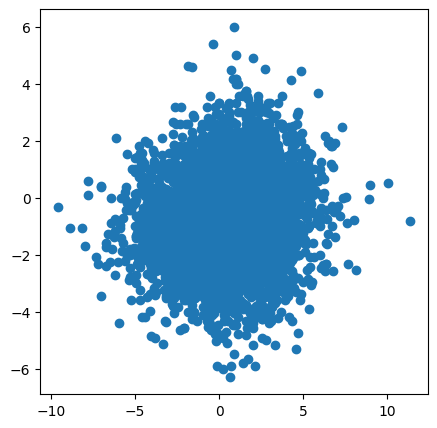

In [58]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))

이 그림에는 문제가 많이 있습니다. 논문의 그림 Figure 4D처럼 한 번 만들어 봅시다~

In [22]:
#논문의 제한조건 적용한 read counts
cnts1 = cnts[(cnts['RNA-control.bam'] >= 30) & (cnts['RNA-siLin28a.bam'] >= 30) &(cnts['RNA-siLuc.bam'] >= 30) &(cnts['RPF-siLuc.bam'] >= 80)]
cnts1['clip_enrichment'] = cnts1['CLIP-35L33G.bam'] / cnts1['RNA-control.bam']
cnts1['rden_change'] = (cnts1['RPF-siLin28a.bam'] / cnts1['RNA-siLin28a.bam']) / (cnts1['RPF-siLuc.bam'] / cnts1['RNA-siLuc.bam'])
cnts1['Geneid'] = cnts1.iloc[:,0].apply(lambda x: x.split('.')[0])
cnts1


/tmp/ipykernel_4654/2396461144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnts1['clip_enrichment'] = cnts1['CLIP-35L33G.bam'] / cnts1['RNA-control.bam']
/tmp/ipykernel_4654/2396461144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnts1['rden_change'] = (cnts1['RPF-siLin28a.bam'] / cnts1['RNA-siLin28a.bam']) / (cnts1['RPF-siLuc.bam'] / cnts1['RNA-siLuc.bam'])
/tmp/ipykernel_4654/2396461144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
31,ENSMUSG00000033845,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,3191,2.962362,0.494091
35,ENSMUSG00000033813,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,762,2130,2225,328,609,2.175853,0.562609
43,ENSMUSG00000033793,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,474,1260,1031,603,1128,2.343882,0.437418
53,ENSMUSG00000025907,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,6276421;6276451;6284869;6284887;6285232;629382...,6276494;6276494;6285181;6285181;6285476;629396...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14690,1520,280,694,903,132,251,5.428571,0.684272
67,ENSMUSG00000051285,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,7159144;7159154;7159328;7159390;7190418;721786...,7159440;7159440;7159440;7159440;7190839;721796...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,6654,3508,529,2360,1775,208,138,6.631380,1.133628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55344,ENSMUSG00000064358,chrM,8607,9390,+,784,6,56,86,50,72,94,0.107143,0.445324
55349,ENSMUSG00000064363,chrM,10167,11544,+,1378,373,2150,5028,4224,3292,2498,0.173488,1.107123
55353,ENSMUSG00000064367,chrM,11742,13565,+,1824,3665,5281,15549,17408,5986,5305,0.693997,1.263275
55354,ENSMUSG00000064368,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842,0.843117,1.263780


/home/aajun/miniconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


(-3.0, 2.0)

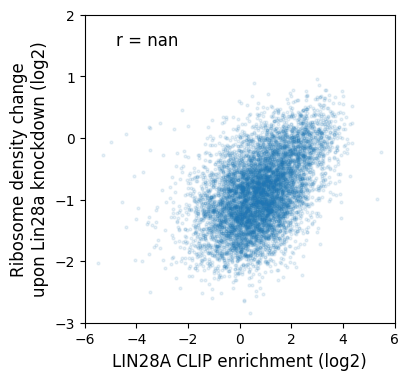

In [59]:
from matplotlib import pyplot as plt
import numpy as np

plt.subplots(1, 1, figsize=(4, 4))
r = np.corrcoef(np.log2(cnts1['clip_enrichment']), np.log2(cnts1['rden_change']))[0, 1]
plt.scatter(np.log2(cnts1['clip_enrichment']),
           np.log2(cnts1['rden_change']), s =4, alpha = 0.1 )
plt.text(0.1, 0.9, 'r = {:.4f}'.format(r), fontsize=12, transform = plt.gca().transAxes)
plt.xlabel('LIN28A CLIP enrichment (log2)', fontsize = 12)
plt.ylabel('Ribosome density change\nupon Lin28a knockdown (log2)', fontsize = 12)
plt.xlim(-6,6)
plt.ylim(-3,2)

In [60]:
merged_df = pd.merge(cnts1, ensemblmap_df, left_on = 'Geneid', right_on = 'Value')
merged_df.rename(columns={'Key':'Genename'}, inplace = True)
merged_df

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,Value,Genename
0,ENSMUSG00000033845,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,3191,2.962362,0.494091,ENSMUSG00000033845,Mrpl15
1,ENSMUSG00000033813,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,762,2130,2225,328,609,2.175853,0.562609,ENSMUSG00000033813,Tcea1
2,ENSMUSG00000033793,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,474,1260,1031,603,1128,2.343882,0.437418,ENSMUSG00000033793,Atp6v1h
3,ENSMUSG00000025907,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,6276421;6276451;6284869;6284887;6285232;629382...,6276494;6276494;6285181;6285181;6285476;629396...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14690,1520,280,694,903,132,251,5.428571,0.684272,ENSMUSG00000025907,Rb1cc1
4,ENSMUSG00000051285,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,7159144;7159154;7159328;7159390;7190418;721786...,7159440;7159440;7159440;7159440;7190839;721796...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,6654,3508,529,2360,1775,208,138,6.631380,1.133628,ENSMUSG00000051285,Pcmtd1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,ENSMUSG00000064358,chrM,8607,9390,+,784,6,56,86,50,72,94,0.107143,0.445324,ENSMUSG00000064358,mt-Co3
7983,ENSMUSG00000064363,chrM,10167,11544,+,1378,373,2150,5028,4224,3292,2498,0.173488,1.107123,ENSMUSG00000064363,mt-Nd4
7984,ENSMUSG00000064367,chrM,11742,13565,+,1824,3665,5281,15549,17408,5986,5305,0.693997,1.263275,ENSMUSG00000064367,mt-Nd5
7985,ENSMUSG00000064368,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842,0.843117,1.263780,ENSMUSG00000064368,mt-Nd6


In [61]:
import pandas as pd
import gzip

# GAF 파일 컬럼명 (version 2.1 기준)
columns = [
    'DB', 'DB_Object_ID', 'DB_Object_Symbol', 'Qualifier', 'GO_ID', 
    'DB:Reference', 'Evidence_Code', 'With_or_From', 'Aspect', 
    'DB_Object_Name', 'DB_Object_Synonym', 'DB_Object_Type', 
    'Taxon', 'Date', 'Assigned_By', 'Annotation_Extension'
]
def read_gaf_gz(file_path, nrows=None):
    """
    GAF.gz 파일을 읽고 일부만 pandas DataFrame으로 반환하는 함수
    
    Parameters:
    - file_path: str, GAF.gz 파일 경로
    - nrows: int, 읽어올 행 수 (기본값: None, 모든 행 읽음)
    
    Returns:
    - pandas DataFrame
    """
    with gzip.open(file_path, 'rt') as f:
        # '#'로 시작하는 주석 행 제거 후, 데이터 읽기
        data = [line for line in f if not line.startswith('!')]
        
    # pandas DataFrame으로 변환
    df = pd.DataFrame([line.strip().split('\t') for line in data], columns=columns)
    
    if nrows:
        df = df.head(nrows)
        
    return df

# 사용 예시
file_path = 'goa_mouse.gaf.gz'
read_gaf_df = read_gaf_gz(file_path, nrows=None)
read_gaf_df_subset = read_gaf_df[['DB_Object_Symbol','GO_ID']]
read_gaf_df_subset2 = read_gaf_df_subset.groupby('DB_Object_Symbol').agg(lambda x: list(x)).reset_index()
read_gaf_df_subset_as_set = set(read_gaf_df_subset['GO_ID'])
len(read_gaf_df_subset_as_set)

18607

In [309]:
'''import requests

def get_go_term(go_id):
    url = f"http://api.geneontology.org/api/ontology/term/{go_id}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        return data.get('label', 'No matching term found')
    else:
        return 'a'


# 결과를 저장할 사전
go_terms = {}

# 각 GO ID에 대해 용어 검색
for go_id in read_gaf_df_subset_as_set:
    term = get_go_term(go_id)
    go_terms[go_id] = term
################연구실컴으로하기!!!!'''

KeyboardInterrupt: 

In [62]:
read_gaf_df.head()

,DB,DB_Object_ID,DB_Object_Symbol,Qualifier,GO_ID,DB:Reference,Evidence_Code,With_or_From,Aspect,DB_Object_Name,DB_Object_Synonym,DB_Object_Type,Taxon,Date,Assigned_By,Annotation_Extension
0,UniProtKB,A0A075B5I2,Trbv4,involved_in,GO:0007166,GO_REF:0000033,IBA,MGI:MGI:98608|PANTHER:PTN000588091,P,Ig-like domain-containing protein,Trbv4,protein,taxon:10090,20171207,GO_Central,None
1,UniProtKB,A0A075B5I2,Trbv4,is_active_in,GO:0005886,GO_REF:0000033,IBA,MGI:MGI:98596|PANTHER:PTN000588091|UniProtKB:A...,C,Ig-like domain-containing protein,Trbv4,protein,taxon:10090,20221008,GO_Central,None
2,UniProtKB,A0A075B5J4,Trbc2,part_of,GO:0042105,GO_REF:0000033,IBA,PANTHER:PTN001511926|UniProtKB:A0A5B9,C,Ig-like domain-containing protein,Trbc2,protein,taxon:10090,20230314,GO_Central,None
3,UniProtKB,A0A075B5J6,Gm20730,involved_in,GO:0006955,GO_REF:0000033,IBA,MGI:MGI:98936|PANTHER:PTN000587099|UniProtKB:P...,P,Ig-like domain-containing protein,Gm20730,protein,taxon:10090,20200809,GO_Central,None
4,UniProtKB,A0A075B5J6,Gm20730,is_active_in,GO:0005615,GO_REF:0000033,IBA,PANTHER:PTN000587099|UniProtKB:P01619,C,Ig-like domain-containing protein,Gm20730,protein,taxon:10090,20200809,GO_Central,None


In [63]:
test_df = read_gaf_df.head()
test_df_subset = test_df[['DB_Object_Symbol','GO_ID']]
test_df_subset
a = test_df_subset.groupby('DB_Object_Symbol').agg(lambda x: list(x)).reset_index()
a

,DB_Object_Symbol,GO_ID
0,Gm20730,"[GO:0006955, GO:0005615]"
1,Trbc2,[GO:0042105]
2,Trbv4,"[GO:0007166, GO:0005886]"


In [64]:
GO_merge = pd.merge(merged_df, read_gaf_df_subset2, left_on = 'Genename', right_on = 'DB_Object_Symbol')
GO_merge_subset = GO_merge[['Geneid', 'Length','CLIP-35L33G.bam','RNA-control.bam','RNA-siLin28a.bam','RNA-siLuc.bam','RPF-siLin28a.bam','RPF-siLuc.bam','clip_enrichment','rden_change','Genename','GO_ID']]
GO_merge_subset

,Geneid,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,Genename,GO_ID
0,ENSMUSG00000033845,8487,4014,1355,3022,2563,1859,3191,2.962362,0.494091,Mrpl15,"[GO:0000002, GO:0006412, GO:1990830, GO:000373..."
1,ENSMUSG00000033813,3017,1658,762,2130,2225,328,609,2.175853,0.562609,Tcea1,"[GO:0030218, GO:0045893, GO:0045944, GO:000367..."
2,ENSMUSG00000033793,9746,1111,474,1260,1031,603,1128,2.343882,0.437418,Atp6v1h,"[GO:0046961, GO:0006897, GO:0097401, GO:009740..."
3,ENSMUSG00000025907,14690,1520,280,694,903,132,251,5.428571,0.684272,Rb1cc1,"[GO:0006915, GO:0006915, GO:0097191, GO:009719..."
4,ENSMUSG00000051285,6654,3508,529,2360,1775,208,138,6.631380,1.133628,Pcmtd1,"[GO:0008757, GO:0004719, GO:1990756, GO:001656..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7614,ENSMUSG00000069049,4161,599,335,629,638,249,463,1.788060,0.545492,Eif2s3y,"[GO:0000049, GO:0003743, GO:0003924, GO:000552..."
7615,ENSMUSG00000068457,9791,415,130,350,358,145,189,3.192308,0.784732,Uty,"[GO:0001701, GO:0001701, GO:0003007, GO:000750..."
7616,ENSMUSG00000069045,5199,1823,469,1219,1092,139,384,3.886994,0.324267,Ddx3y,"[GO:0003724, GO:0003729, GO:0005524, GO:001688..."
7617,ENSMUSG00000064345,1038,269,1253,3021,3012,2975,2156,0.214685,1.375759,mt-Nd2,"[GO:0072593, GO:0008137, GO:0008137, GO:001990..."


In [65]:
# inf 값을 NaN으로 대체
GO_merge_subset.replace([np.inf, -np.inf], np.nan, inplace=True)

# NaN 값을 포함하는 행을 제거
GO_merge_subset.dropna(inplace=True)
GO_merge_subset

/tmp/ipykernel_4654/966071955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GO_merge_subset.replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_4654/966071955.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GO_merge_subset.dropna(inplace=True)


,Geneid,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,Genename,GO_ID
0,ENSMUSG00000033845,8487,4014,1355,3022,2563,1859,3191,2.962362,0.494091,Mrpl15,"[GO:0000002, GO:0006412, GO:1990830, GO:000373..."
1,ENSMUSG00000033813,3017,1658,762,2130,2225,328,609,2.175853,0.562609,Tcea1,"[GO:0030218, GO:0045893, GO:0045944, GO:000367..."
2,ENSMUSG00000033793,9746,1111,474,1260,1031,603,1128,2.343882,0.437418,Atp6v1h,"[GO:0046961, GO:0006897, GO:0097401, GO:009740..."
3,ENSMUSG00000025907,14690,1520,280,694,903,132,251,5.428571,0.684272,Rb1cc1,"[GO:0006915, GO:0006915, GO:0097191, GO:009719..."
4,ENSMUSG00000051285,6654,3508,529,2360,1775,208,138,6.631380,1.133628,Pcmtd1,"[GO:0008757, GO:0004719, GO:1990756, GO:001656..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7614,ENSMUSG00000069049,4161,599,335,629,638,249,463,1.788060,0.545492,Eif2s3y,"[GO:0000049, GO:0003743, GO:0003924, GO:000552..."
7615,ENSMUSG00000068457,9791,415,130,350,358,145,189,3.192308,0.784732,Uty,"[GO:0001701, GO:0001701, GO:0003007, GO:000750..."
7616,ENSMUSG00000069045,5199,1823,469,1219,1092,139,384,3.886994,0.324267,Ddx3y,"[GO:0003724, GO:0003729, GO:0005524, GO:001688..."
7617,ENSMUSG00000064345,1038,269,1253,3021,3012,2975,2156,0.214685,1.375759,mt-Nd2,"[GO:0072593, GO:0008137, GO:0008137, GO:001990..."


In [66]:
def filter_df_by_GO(go_ids, go_id_nots):
    # 특정 GO_ID를 가지는 행 필터링
    filtered_df = GO_merge_subset[GO_merge_subset['GO_ID'].apply(lambda x: any(go_id in x for go_id in go_ids)) & GO_merge_subset['GO_ID'].apply(lambda x: all(go_id_not not in x for go_id_not in go_id_nots))]
    return filtered_df

# 사용 예시
go_id = ['GO:0005634']
go_id_not = ['GO:0031966']
result = filter_df_by_GO(go_id, go_id_not)


In [67]:
def GO_other(GO):
    other_df = GO_merge_subset[~GO_merge_subset.isin(GO)].dropna()
    other_clip_avg = other_df['clip_enrichment'].mean()
    other_rden_avg = other_df['rden_change'].mean()
    return [other_clip_avg, other_rden_avg]

In [68]:
go_id = ['GO:0031966']
go_id_not = ['none']
mitocondrial_membrane = filter_df_by_GO(go_id, go_id_not)
len(mitocondrial_membrane)

91

In [69]:
go_id = ['GO:0005634']
go_id_not = ['GO:0031966']
Nucleus = filter_df_by_GO(go_id, go_id_not)
len(Nucleus)

2678

In [70]:
go_id = ['GO:0005737']
go_id_not = ['GO:0031966']
Cytoplasm = filter_df_by_GO(go_id, go_id_not)
len(Cytoplasm)

2509

In [71]:
go_id = ['GO:0005789']
go_id_not = ['GO:0031966']
Endoplasmic_reticulum_membrane = filter_df_by_GO(go_id, go_id_not)
len(Endoplasmic_reticulum_membrane)

484

In [72]:
go_id = ['GO:0005783']
go_id_not = ['GO:0031966']
Endoplasmic_reticulum = filter_df_by_GO(go_id, go_id_not)
len(Endoplasmic_reticulum)

527

In [73]:
go_id = ['GO:0005739']
go_id_not = ['none']
Mitochondrion = filter_df_by_GO(go_id, go_id_not)
len(Mitochondrion)

1077

In [74]:
go_id = ['GO:0005576']
go_id_not = ['GO:0031966']
Extracellular_region = filter_df_by_GO(go_id, go_id_not)
len(Extracellular_region)

173

In [75]:
go_id = ['GO:0009986','GO:0009928', 'GO:0009929']
go_id_not = ['GO:0031966']
Cell_surface = filter_df_by_GO(go_id, go_id_not)
len(Cell_surface)

196

In [76]:
go_id = ['GO:0005794']
go_id_not = ['GO:0031966']
Golgi_apparatus = filter_df_by_GO(go_id, go_id_not)
len(Golgi_apparatus)

447

In [77]:
go_id = ['GO:0000786','GO:0000787', 'GO:0000788', 'GO:0005718']
go_id_not = []
Nucleosome = filter_df_by_GO(go_id, go_id_not)
len(Nucleosome)

37

In [78]:
go_id = ['GO:0005509']
go_id_not = ['GO:0031966']
Calcium_ion_binding = filter_df_by_GO(go_id, go_id_not)
len(Calcium_ion_binding)

181

In [79]:
go_id = ['GO:0006334']
go_id_not = ['none']
Nucleosome_assembly = filter_df_by_GO(go_id, go_id_not)
len(Nucleosome_assembly)

36

In [80]:
go_id = ['GO:0030203']
go_id_not = ['none']
Glycosaminoglycan_metabolic_process = filter_df_by_GO(go_id, go_id_not)
len(Glycosaminoglycan_metabolic_process)

3

In [81]:
go_id = ['GO:0005788','GO:0016022']
go_id_not = ['GO:0031966']
Endoplasmic_reticulum_lumen = filter_df_by_GO(go_id, go_id_not)
Endoplasmic_reticulum_lumen.head()

,Geneid,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,Genename,GO_ID
37,ENSMUSG00000037470,12853,9763,1574,5584,3732,11416,7892,6.202668,0.966770,Uggt1,"[GO:0003980, GO:0003980, GO:0003980, GO:000551..."
65,ENSMUSG00000026047,3199,688,230,496,419,714,649,2.991304,0.929364,Poglut2,"[GO:0035251, GO:0035252, GO:0046527, GO:014056..."
298,ENSMUSG00000043019,6381,6575,478,1416,1296,1511,1342,13.755230,1.030514,Edem3,"[GO:0006516, GO:0043161, GO:0004571, GO:000457..."
316,ENSMUSG00000060519,3892,851,305,942,614,786,815,2.790164,0.628612,Tor3a,"[GO:0005515, GO:0005524, GO:0016887, GO:000563..."
534,ENSMUSG00000039787,3383,144,75,150,142,348,337,1.920000,0.977567,Cercam,"[GO:0050211, GO:0007155, GO:0042802, GO:000557..."


In [82]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [83]:
import numpy as np
from scipy.stats import mannwhitneyu

# Mann-Whitney U 테스트를 수행합니다.
GO_list = [Nucleus,Cytoplasm,Endoplasmic_reticulum_membrane,Endoplasmic_reticulum,Mitochondrion,\
           Extracellular_region,Cell_surface,Golgi_apparatus,Nucleosome,Calcium_ion_binding,\
           Nucleosome_assembly,Glycosaminoglycan_metabolic_process,Endoplasmic_reticulum_lumen]
GO_term = ['Nucleus','Cytoplasm','Endoplasmic reticulum membrane','Endoplasmic reticulum','Mitochondrion',\
           'Extracellular region','Cell surface','Golgi apparatus','Nucleosome','Calcium ion binding',\
           'Nucleosome assembly','Glycosaminoglycan metabolic process','Endoplasmic reticulum lumen']
clip_p_value_list = []
for i in GO_list:
    GO_other(i)
    _, p_value = mannwhitneyu(np.log2(GO_merge_subset['clip_enrichment']), np.log2(i['clip_enrichment']), alternative='two-sided')
    clip_p_value_list.append(p_value)

rden_p_value_list = []
for i in GO_list:
    _, p_value = mannwhitneyu(np.log2(GO_merge_subset['rden_change']), np.log2(i['rden_change']), alternative='two-sided')
    rden_p_value_list.append(p_value)


print(clip_p_value_list)
print(rden_p_value_list)



/home/aajun/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/aajun/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/aajun/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/aajun/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/aajun/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/aajun/miniconda3/lib/python3.12/site-packages/pandas/core/arrayl

[4.862002955109981e-06, 2.2576243911446898e-11, 4.086921558294398e-40, 1.748970398927803e-26, 4.080760918925966e-08, 1.336056152757649e-11, 4.029055352723186e-20, 9.718241928895384e-15, 0.4149081917373514, 3.867086249156698e-11, 0.40808577655696876, 0.229691175623138, 1.7582312669567112e-14]
[8.858059285264274e-47, 1.8791917291536988e-31, 9.043201440657335e-85, 6.668046965999941e-51, 0.034161468891585216, 1.1161875268688147e-29, 1.0983782711446094e-34, 7.55809007946683e-19, 0.004921864391510607, 1.2547441035258795e-14, 0.0004347331330639405, 0.053859818583306227, 1.6489529038028618e-19]


/home/aajun/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/aajun/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/aajun/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/aajun/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [84]:
def benjamin_hochberg(p_values, alpha=0.05):
    # p-values 배열의 길이
    m = len(p_values)
    
    # p-values를 정렬하고 인덱스를 기록합니다.
    sorted_indices = np.argsort(p_values)
    sorted_p_values = np.array(p_values)[sorted_indices]
    print('sorted_indices=',sorted_indices)
    print('sorted_p_values=',sorted_p_values)
    
    # FDR을 조정한 p-values를 초기화합니다.
    adjusted_p_values = np.zeros(m)
    testa = np.arange(1, m+1)/m
    testb = sorted_p_values/testa
    print('testa',testa,'testb',testb)

    for i in range(m):
        adjusted_p_values[sorted_indices[i]] = testb[i]

    adjusted_p_values_list = adjusted_p_values.tolist()

    return adjusted_p_values_list

'''
    # 최종적으로 BH 방법으로 조정된 p-values를 저장합니다.
    for i in range(m):
        if testb[i] <= alpha:
            adjusted_p_values[sorted_indices[i]] = testb[i]
        else:
            adjusted_p_values[sorted_indices[i]] = alpha
'''
# BH 방법으로 FDR 조정된 p-values를 계산합니다.
C_adjusted_p_values = benjamin_hochberg(clip_p_value_list, alpha=0.05)
print(C_adjusted_p_values)
R_adjusted_p_values = benjamin_hochberg(rden_p_value_list, alpha=0.05)
print(R_adjusted_p_values)


sorted_indices= [ 2  3  6  7 12  5  1  9  4  0 11 10  8]
sorted_p_values= [4.08692156e-40 1.74897040e-26 4.02905535e-20 9.71824193e-15
 1.75823127e-14 1.33605615e-11 2.25762439e-11 3.86708625e-11
 4.08076092e-08 4.86200296e-06 2.29691176e-01 4.08085777e-01
 4.14908192e-01]
testa [0.07692308 0.15384615 0.23076923 0.30769231 0.38461538 0.46153846
 0.53846154 0.61538462 0.69230769 0.76923077 0.84615385 0.92307692
 1.        ] testb [5.31299803e-39 1.13683076e-25 1.74592399e-19 3.15842863e-14
 4.57140129e-14 2.89478833e-11 4.19273101e-11 6.28401515e-11
 5.89443244e-08 6.32060384e-06 2.71453208e-01 4.42092925e-01
 4.14908192e-01]
[6.320603841642975e-06, 4.192731012125853e-11, 5.312998025782717e-39, 1.1368307593030718e-25, 5.894432438448618e-08, 2.894788330974906e-11, 1.7459239861800471e-19, 3.158428626891e-14, 0.4149081917373514, 6.284015154879634e-11, 0.4420929246033828, 0.27145320755461766, 4.571401294087449e-14]
sorted_indices= [ 2  3  0  6  1  5 12  7  9 10  8  4 11]
sorted_p_values= [9

In [85]:
result_dict = {'GO_term' : GO_term, 'Clip_p' : clip_p_value_list, 'Rden_p' : rden_p_value_list}
result_df = pd.DataFrame(result_dict)
clip_avg = []
rden_avg =[]
clip_avg_diff = []
rden_avg_diff = []
size = []
for i in GO_list:
    clip_avg.append(i['clip_enrichment'].mean())
    rden_avg.append(i['rden_change'].mean())
    other = GO_other(i)
    clip_avg_diff.append(i['clip_enrichment'].mean()/other[0])
    rden_avg_diff.append(i['rden_change'].mean()/other[1])
    size.append(len(i))
print(clip_avg)
print(rden_avg)
print(clip_avg_diff)
print(rden_avg_diff)
result_df['clip_avg']=clip_avg
result_df['rden_avg']=rden_avg
result_df['clip_avg_diff']=clip_avg_diff
result_df['rden_avg_diff']=rden_avg_diff
result_df['size']=size
result_df['clip_FDR']=C_adjusted_p_values
result_df['rden_FDR']=R_adjusted_p_values

result_df

[2.1634775065538383, 2.154065654298886, 4.195172210294597, 3.916505303658679, 2.039122508789123, 3.9496178714111685, 4.205499622593869, 3.40538745961425, 2.428788371739774, 3.9458792804232505, 2.1122587329467546, 2.806045789479407, 5.188363557708908]
[0.5048768542680077, 0.5219627609488382, 0.8378096464519944, 0.7686285737763386, 0.5874996865709576, 0.8480149466867299, 0.8371765313060632, 0.7145500776592529, 0.47729164484794007, 0.7332174002024869, 0.4500773934231528, 0.8172136384749645, 0.9031990177857564]
[0.8205496218823314, 0.8204110438005766, 1.7826685695090325, 1.6575343174638402, 0.8023928643137833, 1.621390271163339, 1.734585207399573, 1.4118309803374123, 0.9831089921524578, 1.620878275150987, 0.8544683716831863, 1.1359667586752649, 2.1187885610698713]
[0.7918829110037737, 0.8354243698717146, 1.4591429422545155, 1.3304479815454484, 0.9932526898637627, 1.4497138668252072, 1.4324804161127311, 1.2251777100680588, 0.80694326913097, 1.2481062506649514, 0.7607861048903577, 1.38314480

,GO_term,Clip_p,Rden_p,clip_avg,rden_avg,clip_avg_diff,rden_avg_diff,size,clip_FDR,rden_FDR
0,Nucleus,4.862003e-06,8.858059e-47,2.163478,0.504877,0.820550,0.791883,2678,6.320604e-06,3.838492e-46
1,Cytoplasm,2.257624e-11,1.879192e-31,2.154066,0.521963,0.820411,0.835424,2509,4.192731e-11,4.885898e-31
2,Endoplasmic reticulum membrane,4.086922e-40,9.043201e-85,4.195172,0.837810,1.782669,1.459143,484,5.312998e-39,1.175616e-83
3,Endoplasmic reticulum,1.748970e-26,6.668047e-51,3.916505,0.768629,1.657534,1.330448,527,1.136831e-25,4.334231e-50
4,Mitochondrion,4.080761e-08,3.416147e-02,2.039123,0.587500,0.802393,0.993253,1077,5.894432e-08,3.700826e-02
5,Extracellular region,1.336056e-11,1.116188e-29,3.949618,0.848015,1.621390,1.449714,173,2.894788e-11,2.418406e-29
6,Cell surface,4.029055e-20,1.098378e-34,4.205500,0.837177,1.734585,1.432480,196,1.745924e-19,3.569729e-34
7,Golgi apparatus,9.718242e-15,7.558090e-19,3.405387,0.714550,1.411831,1.225178,447,3.158429e-14,1.228190e-18
8,Nucleosome,4.149082e-01,4.921864e-03,2.428788,0.477292,0.983109,0.806943,37,4.149082e-01,5.816749e-03
9,Calcium ion binding,3.867086e-11,1.254744e-14,3.945879,0.733217,1.620878,1.248106,181,6.284015e-11,1.812408e-14


<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:27: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:27: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_4654/2099873262.py:26: SyntaxWarning: invalid escape sequence '\l'
  ax[0, 1].set_xlabel('Enrichment level of LIN28A-bound CLIP tags ($\log_2$)', fontsize=17)
/tmp/ipykernel_4654/2099873262.py:27: SyntaxWarning: invalid escape sequence '\l'
  ax[0, 1].set_ylabel('Ribosome density change upon $\\mathit{Lin28a}$ knockdown ($\log_2$)', fontsize=17)


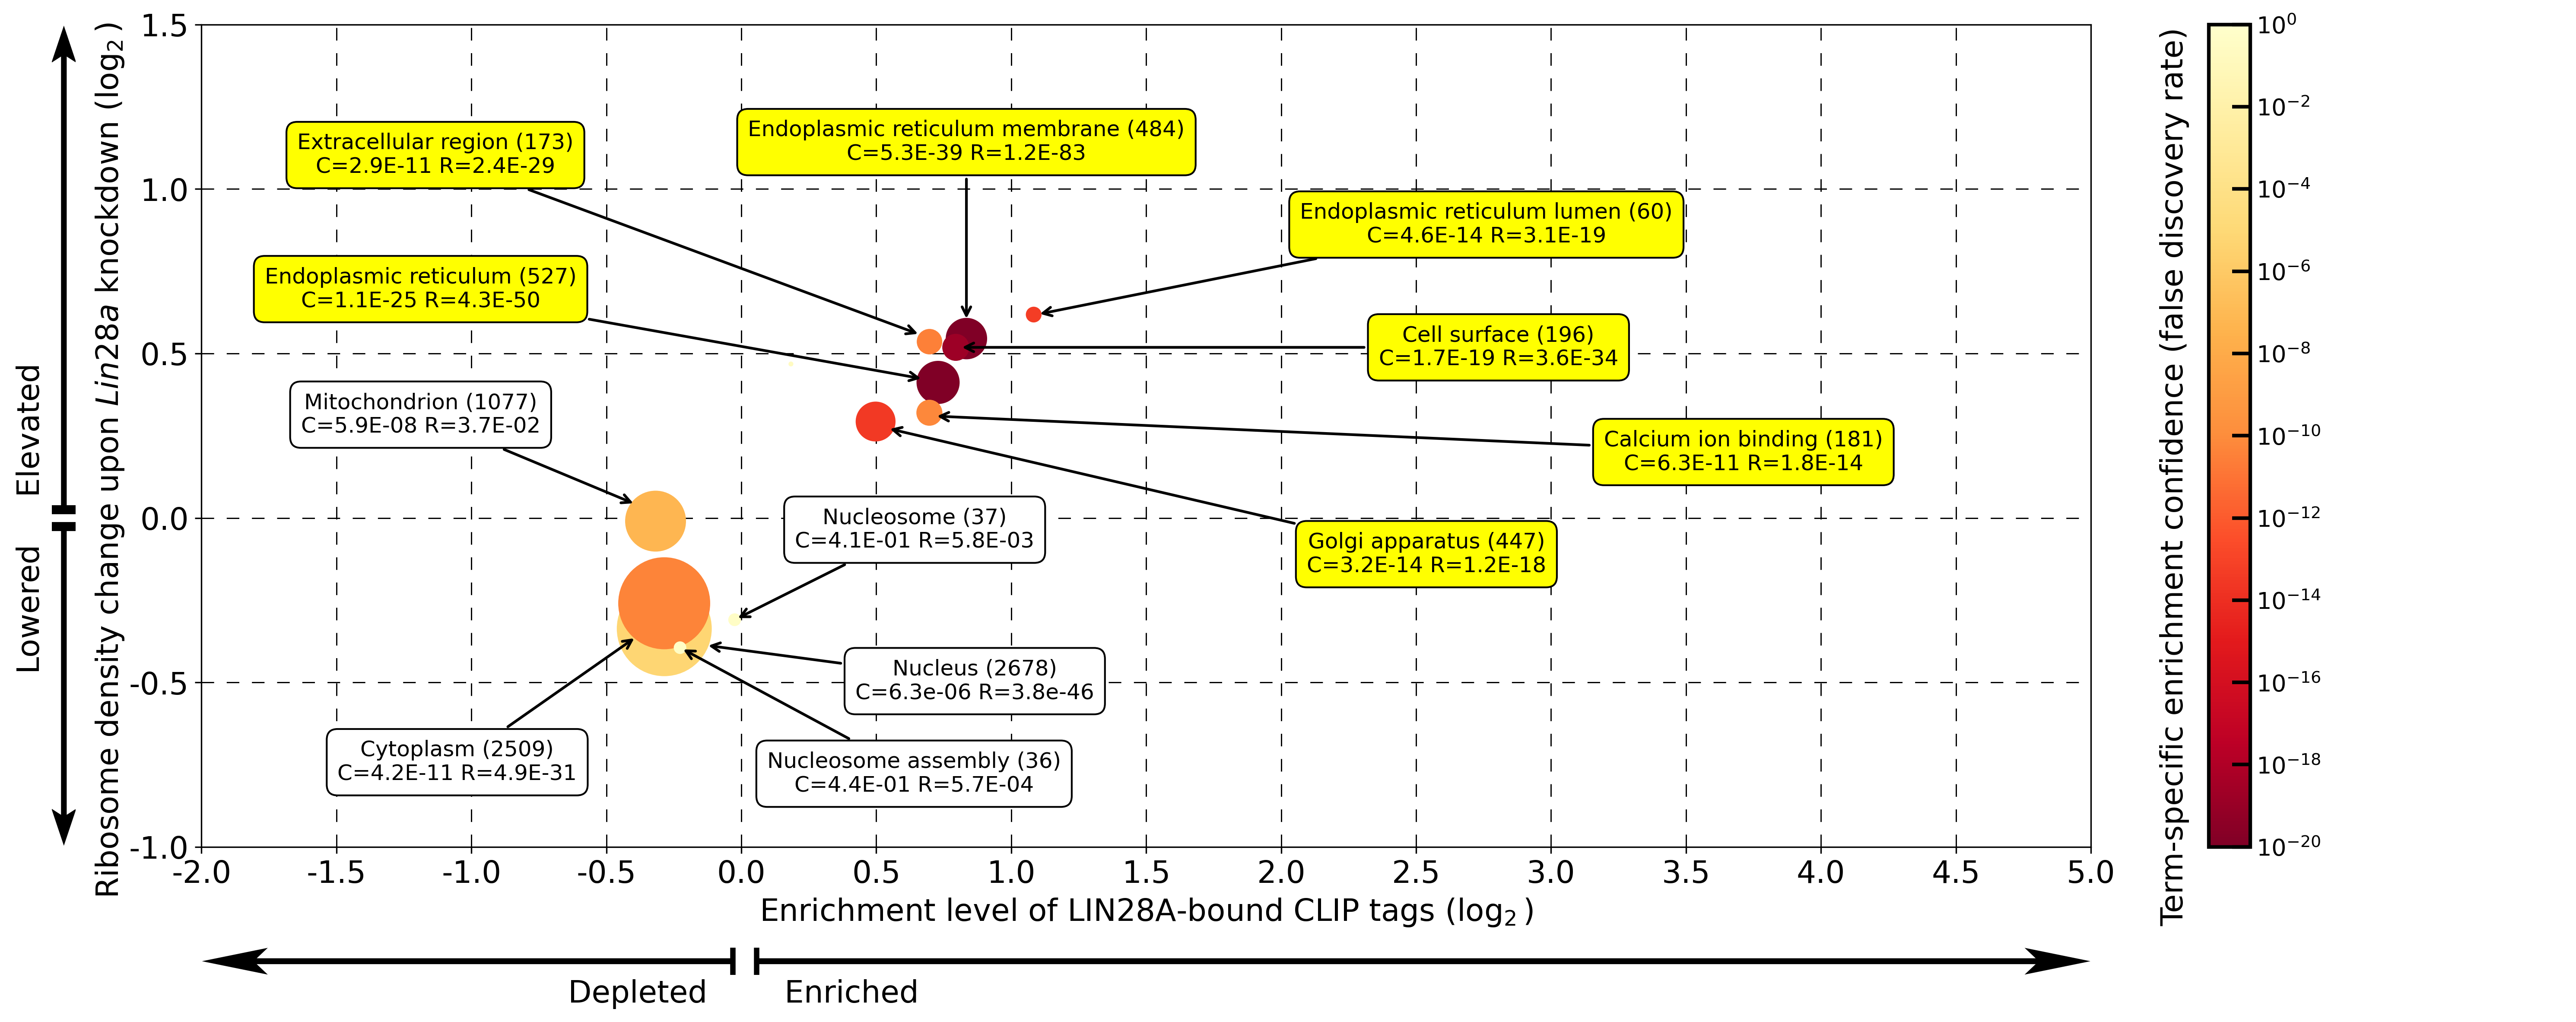

In [86]:
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import numpy as np
fig, ax = plt.subplots(2, 2, figsize=(20, 8), gridspec_kw={'width_ratios': [1, 100], 'height_ratios': [30, 1]}, dpi=300)
ax[0, 1].grid(True, linestyle='--', dashes=(10,10), linewidth=0.7, color='black', zorder = -1000)
scatter = ax[0, 1].scatter(np.log2(result_df['clip_avg_diff']),
                            np.log2(result_df['rden_avg_diff']),
                            s=result_df['size'],
                            c=result_df['clip_FDR'],
                            cmap='YlOrRd_r',
                            norm=colors.LogNorm(vmin=10**-20, vmax=1), zorder = 1000)
cbar = fig.colorbar(scatter, ax=ax[0, 1])
cbar.set_label('Term-specific enrichment confidence (false discovery rate)', labelpad=-80, fontsize=17)
cbar.ax.yaxis.set_tick_params(labelsize=13)
cbar.ax.yaxis.set_label_coords(-1.2, 0.45)
cbar.set_ticks([10**-0, 10**-2, 10**-4, 10**-6, 10**-8, 10**-10, 10**-12, 10**-14, 10**-16, 10**-18, 10**-20])
cbar.outline.set_linewidth(2)
cbar.outline.set_edgecolor('black')
cbar.ax.tick_params(direction='in', length=10, width=2, colors='black')
ax[0, 1].set_xlim([-2.0, 5.0])
ax[0, 1].set_ylim([-1.0, 1.5])
ax[0, 1].set_xticks(np.arange(-2.0, 5.1, step=0.5))
ax[0, 1].set_yticks(np.arange(-1.0, 1.6, step=0.5))
ax[0, 1].set_xticklabels(ax[0, 1].get_xticks(), fontsize=17)
ax[0, 1].set_yticklabels(ax[0, 1].get_yticks(), fontsize=17)
ax[0, 1].set_xlabel('Enrichment level of LIN28A-bound CLIP tags ($\log_2$)', fontsize=17)
ax[0, 1].set_ylabel('Ribosome density change upon $\\mathit{Lin28a}$ knockdown ($\log_2$)', fontsize=17)
ax[0, 1].yaxis.set_label_coords(-0.04, 0.47)

#화살표 & 말풍선
#nucleus
x_pos = np.log2(result_df['clip_avg_diff'][0])
y_pos = np.log2(result_df['rden_avg_diff'][0])
annotate_text = f'{GO_term[0]} ({result_df['size'][0]})\nC={result_df['clip_FDR'][0]:.1e} R={result_df['rden_FDR'][0]:.1e}'
ax[0, 1].annotate(annotate_text,
                  xy=(x_pos+0.15, y_pos-0.05),
                  xytext=(150, -20),
                  textcoords='offset points',
                  arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5),
                  fontsize=12,
                  ha='center',
                  va='center',
                  bbox=dict(boxstyle='round,pad=0.5', fc='white'), zorder = 2000)
#cytoplasm
x_pos = np.log2(result_df['clip_avg_diff'][1])  
y_pos = np.log2(result_df['rden_avg_diff'][1]) 
annotate_text = f'{GO_term[1]} ({result_df['size'][1]})\nC={result_df['clip_FDR'][1]:.1E} R={result_df['rden_FDR'][1]:.1E}'
ax[0, 1].annotate(annotate_text,
                  xy=(x_pos-0.1, y_pos-0.1),
                  xytext=(-100, -70),
                  textcoords='offset points',
                  arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5),
                  fontsize=12,
                  ha='center',
                  va='center',
                  bbox=dict(boxstyle='round,pad=0.5', fc='white'), zorder = 2000)
#ER membrane
x_pos = np.log2(result_df['clip_avg_diff'][2])
y_pos = np.log2(result_df['rden_avg_diff'][2])
annotate_text = f'{GO_term[2]} ({result_df['size'][2]})\nC={result_df['clip_FDR'][2]:.1E} R={result_df['rden_FDR'][2]:.1E}'
ax[0, 1].annotate(annotate_text,
                  xy=(x_pos, y_pos+0.05),
                  xytext=(0, 100),
                  textcoords='offset points',
                  arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5),
                  fontsize=12,
                  ha='center',
                  va='center',
                  bbox=dict(boxstyle='round,pad=0.5', fc='yellow'), zorder = 2000)
#ER
x_pos = np.log2(result_df['clip_avg_diff'][3])  
y_pos = np.log2(result_df['rden_avg_diff'][3]) 
annotate_text = f'{GO_term[3]} ({result_df['size'][3]})\nC={result_df['clip_FDR'][3]:.1E} R={result_df['rden_FDR'][3]:.1E}'
ax[0, 1].annotate(annotate_text,
                  xy=(x_pos-0.05, y_pos+0.01),
                  xytext=(-280, 50),
                  textcoords='offset points',
                  arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5),
                  fontsize=12,
                  ha='center',
                  va='center',
                  bbox=dict(boxstyle='round,pad=0.5', fc='yellow'), zorder = 2000)
#Mitochondrion
x_pos = np.log2(result_df['clip_avg_diff'][4])  
y_pos = np.log2(result_df['rden_avg_diff'][4]) 
annotate_text = f'{GO_term[4]} ({result_df['size'][4]})\nC={result_df['clip_FDR'][4]:.1E} R={result_df['rden_FDR'][4]:.1E}'
ax[0, 1].annotate(annotate_text,
                  xy=(x_pos-0.07, y_pos+0.05),
                  xytext=(-120, 50),
                  textcoords='offset points',
                  arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5),
                  fontsize=12,
                  ha='center',
                  va='center',
                  bbox=dict(boxstyle='round,pad=0.5', fc='white'), zorder = 2000)
#Extracellular region
x_pos = np.log2(result_df['clip_avg_diff'][5])  
y_pos = np.log2(result_df['rden_avg_diff'][5]) 
annotate_text = f'{GO_term[5]} ({result_df['size'][5]})\nC={result_df['clip_FDR'][5]:.1E} R={result_df['rden_FDR'][5]:.1E}'
ax[0, 1].annotate(annotate_text,
                  xy=(x_pos-0.03, y_pos+0.02),
                  xytext=(-270, 100),
                  textcoords='offset points',
                  arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5),
                  fontsize=12,
                  ha='center',
                  va='center',
                  bbox=dict(boxstyle='round,pad=0.5', fc='yellow'), zorder = 2000)
#Cell surface
x_pos = np.log2(result_df['clip_avg_diff'][6])  
y_pos = np.log2(result_df['rden_avg_diff'][6]) 
annotate_text = f'{GO_term[6]} ({result_df['size'][6]})\nC={result_df['clip_FDR'][6]:.1E} R={result_df['rden_FDR'][6]:.1E}'
ax[0, 1].annotate(annotate_text,
                  xy=(x_pos+0.01, y_pos),
                  xytext=(300, 0),
                  textcoords='offset points',
                  arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5),
                  fontsize=12,
                  ha='center',
                  va='center',
                  bbox=dict(boxstyle='round,pad=0.5', fc='yellow'), zorder = 2000)
#Golgi apparatus
x_pos = np.log2(result_df['clip_avg_diff'][7])  
y_pos = np.log2(result_df['rden_avg_diff'][7]) 
annotate_text = f'{GO_term[7]} ({result_df['size'][7]})\nC={result_df['clip_FDR'][7]:.1E} R={result_df['rden_FDR'][7]:.1E}'
ax[0, 1].annotate(annotate_text,
                  xy=(x_pos+0.04, y_pos-0.02),
                  xytext=(300, -70),
                  textcoords='offset points',
                  arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5),
                  fontsize=12,
                  ha='center',
                  va='center',
                  bbox=dict(boxstyle='round,pad=0.5', fc='yellow'), zorder = 2000)
#Nucleosome
x_pos = np.log2(result_df['clip_avg_diff'][8])  
y_pos = np.log2(result_df['rden_avg_diff'][8]) 
annotate_text = f'{GO_term[8]} ({result_df['size'][8]})\nC={result_df['clip_FDR'][8]:.1E} R={result_df['rden_FDR'][8]:.1E}'
ax[0, 1].annotate(annotate_text,
                  xy=(x_pos, y_pos),
                  xytext=(100, 50),
                  textcoords='offset points',
                  arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5),
                  fontsize=12,
                  ha='center',
                  va='center',
                  bbox=dict(boxstyle='round,pad=0.5', fc='white'), zorder = 2000)
#Calcium ion binding
x_pos = np.log2(result_df['clip_avg_diff'][9])  
y_pos = np.log2(result_df['rden_avg_diff'][9]) 
annotate_text = f'{GO_term[9]} ({result_df['size'][9]})\nC={result_df['clip_FDR'][9]:.1E} R={result_df['rden_FDR'][9]:.1E}'
ax[0, 1].annotate(annotate_text,
                  xy=(x_pos+0.015, y_pos-0.01),
                  xytext=(450, -20),
                  textcoords='offset points',
                  arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5),
                  fontsize=12,
                  ha='center',
                  va='center',
                  bbox=dict(boxstyle='round,pad=0.5', fc='yellow'), zorder = 2000)
#Nucleosome assembly
x_pos = np.log2(result_df['clip_avg_diff'][10])  
y_pos = np.log2(result_df['rden_avg_diff'][10]) 
annotate_text = f'{GO_term[10]} ({result_df['size'][10]})\nC={result_df['clip_FDR'][10]:.1E} R={result_df['rden_FDR'][10]:.1E}'
ax[0, 1].annotate(annotate_text,
                  xy=(x_pos, y_pos),
                  xytext=(130, -70),
                  textcoords='offset points',
                  arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5),
                  fontsize=12,
                  ha='center',
                  va='center',
                  bbox=dict(boxstyle='round,pad=0.5', fc='white'), zorder = 2000)
#Endoplasmic reticulum lumen
x_pos = np.log2(result_df['clip_avg_diff'][12])  
y_pos = np.log2(result_df['rden_avg_diff'][12]) 
annotate_text = f'{GO_term[12]} ({result_df['size'][12]})\nC={result_df['clip_FDR'][12]:.1E} R={result_df['rden_FDR'][12]:.1E}'
ax[0, 1].annotate(annotate_text,
                  xy=(x_pos+0.01, y_pos),
                  xytext=(250, 50),
                  textcoords='offset points',
                  arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5),
                  fontsize=12,
                  ha='center',
                  va='center',
                  bbox=dict(boxstyle='round,pad=0.5', fc='yellow'), zorder = 2000)




ax[0, 0].spines['left'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['bottom'].set_visible(False)
ax[0, 0].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax[0, 0].set_xlim([0, 1])
ax[0, 0].set_ylim([0, 1])
ax[0,0].axhline(y=0.39, color='black', linewidth=3)
ax[0,0].axhline(y=0.41, color='black', linewidth=3)
ax[0, 0].arrow(0.5, 0.39, 0, -0.35, overhang = .2,
          ec = None, color = 'black', linewidth=2.5,
          width = .05, head_width=.7, head_length=.03)
ax[0, 0].arrow(0.5, 0.41, 0, 0.55, overhang = .2,
          ec = None, color = 'black', linewidth=2.5,
          width = .05, head_width=.7, head_length=.03)
ax[0, 0].axhline(y=0.39, color='black', linewidth=5, xmin=0.05, xmax=0.95)
ax[0, 0].axhline(y=0.41, color='black', linewidth=5, xmin=0.05, xmax=0.95)
ax[0,0].annotate('Lowered', xy=(0.5, 0.35), xytext=(-20, 10),
            textcoords='offset points', ha='center', va='top',
            fontsize=17, color='black', rotation=90)
ax[0,0].annotate('Elevated', xy=(0.5, 0.57), xytext=(-20, 10),
            textcoords='offset points', ha='center', va='top',
            fontsize=17, color='black', rotation=90)




ax[1, 1].spines['left'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['bottom'].set_visible(False)
ax[1, 1].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax[1, 1].set_xlim([0, 1])
ax[1, 1].set_ylim([0, 1])
ax[1, 1].axvline(x=0.225, color='black', linewidth=3)
ax[1, 1].axvline(x=0.235, color='black', linewidth=3)
ax[1, 1].arrow(0.225, 0.5, -0.2, 0, overhang = .2,
          ec = None, color = 'black', linewidth=2.5,
          width = .05, head_width=.7, head_length=.02)
ax[1, 1].arrow(0.235, 0.5, 0.54, 0, overhang = .2,
          ec = None, color = 'black', linewidth=2.5,
          width = .05, head_width=.7, head_length=.02)
ax[1,1].annotate('Depleted', xy=(0.2, 0.5), xytext=(-20, -10),
            textcoords='offset points', ha='center', va='top',
            fontsize=17, color='black')
ax[1,1].annotate('Enriched', xy=(0.26, 0.5), xytext=(20, -10),
            textcoords='offset points', ha='center', va='top',
            fontsize=17, color='black')


ax[1, 0].spines['left'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['bottom'].set_visible(False)
ax[1, 0].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)


plt.tight_layout()


/home/aajun/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


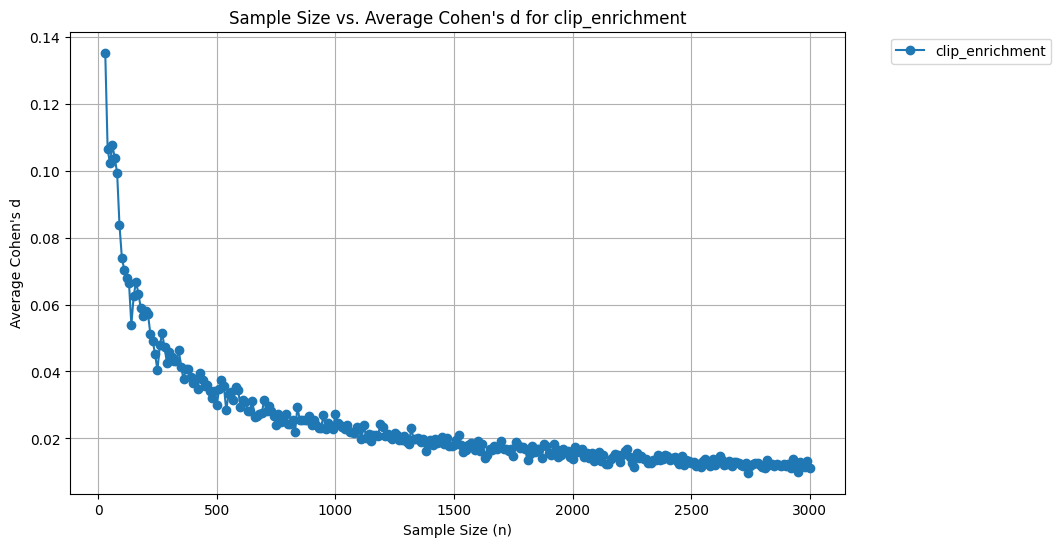

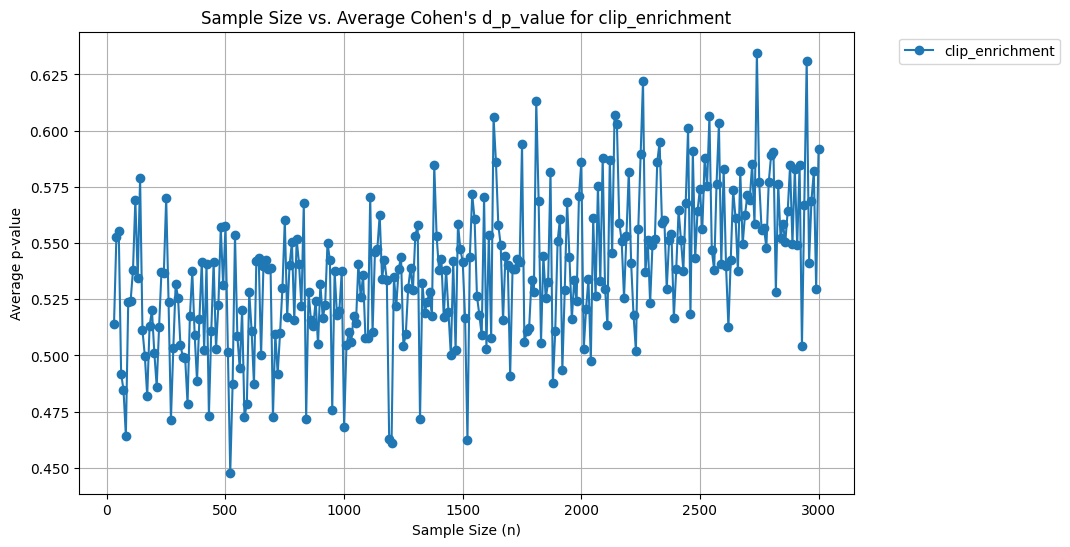

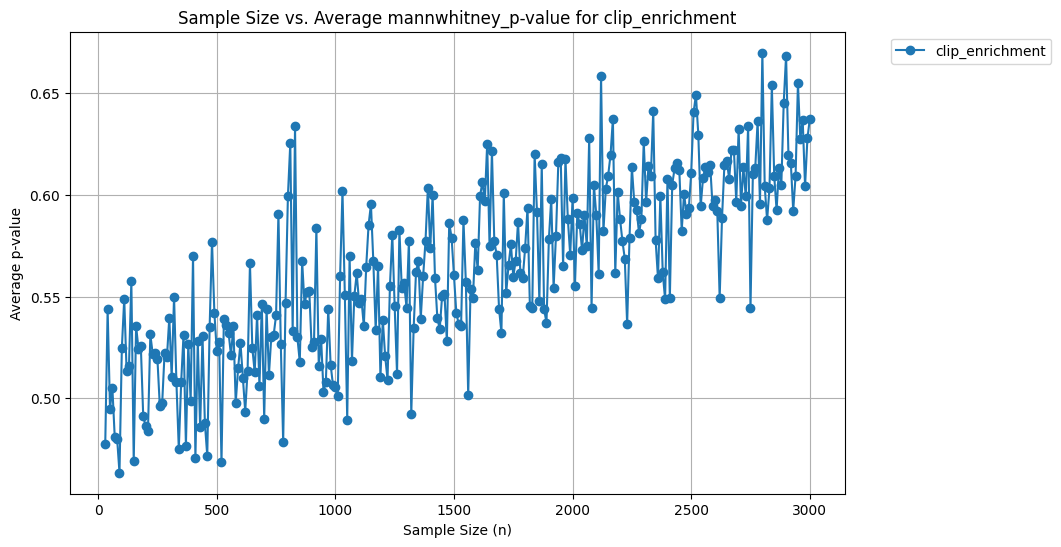

In [87]:
#####통계량 공부
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# 파일 로드
df = GO_merge_subset

# 열 선택
df_selected = df['clip_enrichment']

# 각 feature의 평균과 표준편차 계산
overall_mean = df_selected.mean()
overall_std = df_selected.std()

# 결과 저장을 위한 딕셔너리 초기화
results = []
manwhitney = []
cohen_p_values = []
sample_sizes = range(30, 3001, 10)

# n=30부터 3000까지 10씩 증가하면서 100회 샘플링
for n in sample_sizes:
    for k in range(100):  # 100회 반복
        sample_df = df_selected.sample(n)
        sample_mean = sample_df.mean()
        sample_std = sample_df.std()

        # Cohen's d 계산
        cohen_d = abs((overall_mean - sample_mean) / np.sqrt(((7616 * (overall_std ** 2) + (n - 1) * (sample_std ** 2)) / (7616 + n - 1))))
        _, p_value = mannwhitneyu(np.log2(GO_merge_subset['clip_enrichment']), np.log2(sample_df), alternative='two-sided')
        manwhitney.append((n, p_value))
        results.append((n, cohen_d))

        # t-통계량 계산
        t_stat = cohen_d * np.sqrt(n)

        # 자유도 계산
        df_total = n + 7616 - 2

        # p-value 계산
        cohen_p_value = 2 * (1 - stats.t.cdf(t_stat, df_total))
        cohen_p_values.append((n, cohen_p_value))

# 평균 Cohen's d 및 p-value 계산 및 시각화
plt.figure(figsize=(10, 6))

n_values, d_values = zip(*results)
avg_d_values = [np.mean([d for n, d in results if n == x]) for x in sample_sizes]
plt.plot(sample_sizes, avg_d_values, label='clip_enrichment', marker='o')

plt.xlabel('Sample Size (n)')
plt.ylabel('Average Cohen\'s d')
plt.title('Sample Size vs. Average Cohen\'s d for clip_enrichment')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# cohen_p-value 시각화
plt.figure(figsize=(10, 6))

n_values, p_vals = zip(*cohen_p_values)
avg_p_values = [np.mean([p for n, p in cohen_p_values if n == x]) for x in sample_sizes]
plt.plot(sample_sizes, avg_p_values, label='clip_enrichment', marker='o')

plt.xlabel('Sample Size (n)')
plt.ylabel('Average p-value')
plt.title('Sample Size vs. Average Cohen\'s d_p_value for clip_enrichment')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# mannwhitney_p-value 시각화
plt.figure(figsize=(10, 6))

n_values, p_vals = zip(*manwhitney)
avg_p_values = [np.mean([p for n, p in manwhitney if n == x]) for x in sample_sizes]
plt.plot(sample_sizes, avg_p_values, label='clip_enrichment', marker='o')

plt.xlabel('Sample Size (n)')
plt.ylabel('Average p-value')
plt.title('Sample Size vs. Average mannwhitney_p-value for clip_enrichment')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

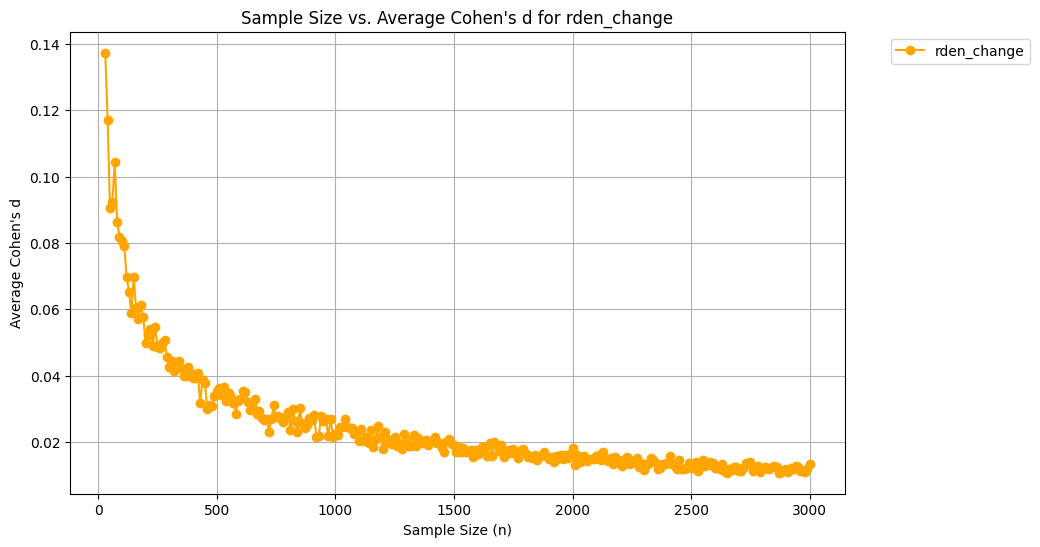

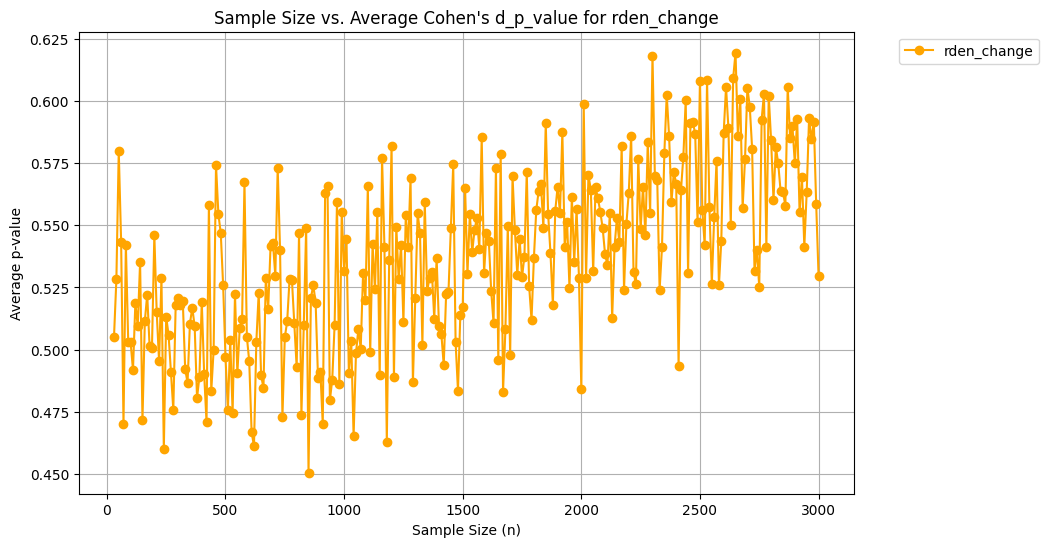

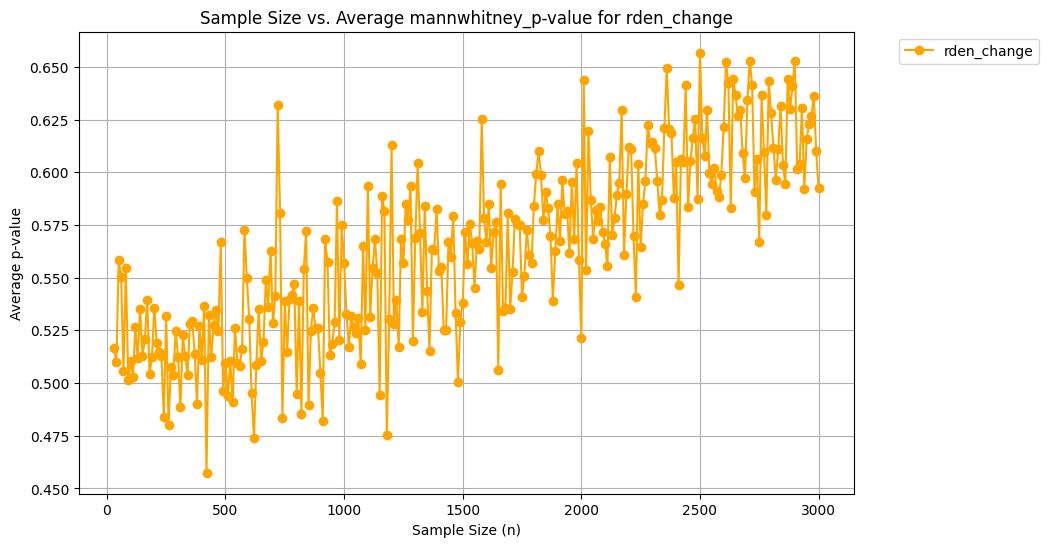

In [88]:
#####통계량 공부
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# 파일 로드
df = GO_merge_subset

# 열 선택
df_selected = df['rden_change']

# 각 feature의 평균과 표준편차 계산
overall_mean = df_selected.mean()
overall_std = df_selected.std()

# 결과 저장을 위한 딕셔너리 초기화
results = []
manwhitney = []
cohen_p_values = []
sample_sizes = range(30, 3001, 10)

# n=30부터 3000까지 10씩 증가하면서 100회 샘플링
for n in sample_sizes:
    for k in range(100):  # 100회 반복
        sample_df = df_selected.sample(n)
        sample_mean = sample_df.mean()
        sample_std = sample_df.std()

        # Cohen's d 계산
        cohen_d = abs((overall_mean - sample_mean) / np.sqrt(((7616 * (overall_std ** 2) + (n - 1) * (sample_std ** 2)) / (7616 + n - 1))))
        _, p_value = mannwhitneyu(np.log2(GO_merge_subset['rden_change']), np.log2(sample_df), alternative='two-sided')
        manwhitney.append((n, p_value))
        results.append((n, cohen_d))

        # t-통계량 계산
        t_stat = cohen_d * np.sqrt(n)

        # 자유도 계산
        df_total = n + 7616 - 2

        # p-value 계산
        cohen_p_value = 2 * (1 - stats.t.cdf(t_stat, df_total))
        cohen_p_values.append((n, cohen_p_value))

# 평균 Cohen's d 및 p-value 계산 및 시각화
plt.figure(figsize=(10, 6))

n_values, d_values = zip(*results)
avg_d_values = [np.mean([d for n, d in results if n == x]) for x in sample_sizes]
plt.plot(sample_sizes, avg_d_values, label='rden_change', marker='o', c = 'orange')

plt.xlabel('Sample Size (n)')
plt.ylabel('Average Cohen\'s d')
plt.title('Sample Size vs. Average Cohen\'s d for rden_change')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# cohen_p-value 시각화
plt.figure(figsize=(10, 6))

n_values, p_vals = zip(*cohen_p_values)
avg_p_values = [np.mean([p for n, p in cohen_p_values if n == x]) for x in sample_sizes]
plt.plot(sample_sizes, avg_p_values, label='rden_change', marker='o', c = 'orange')

plt.xlabel('Sample Size (n)')
plt.ylabel('Average p-value')
plt.title('Sample Size vs. Average Cohen\'s d_p_value for rden_change')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# mannwhitney_p-value 시각화
plt.figure(figsize=(10, 6))

n_values, p_vals = zip(*manwhitney)
avg_p_values = [np.mean([p for n, p in manwhitney if n == x]) for x in sample_sizes]
plt.plot(sample_sizes, avg_p_values, label='rden_change', marker='o', c = 'orange')

plt.xlabel('Sample Size (n)')
plt.ylabel('Average p-value')
plt.title('Sample Size vs. Average mannwhitney_p-value for rden_change')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()